# Question 5

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import mat73
from numpy.linalg import eig
from scipy.sparse.linalg import eigs
import random

data_dict = np.array(mat73.loadmat('ques/data/mnist.mat'))
# print(data_dict)
# X = data_dict.item(0)['x']
# Y = data_dict.item(0)['y']

data_train = data_dict.item(0)['digits_train']
data_test = data_dict.item(0)['digits_test']
train_labels = data_dict.item(0)['labels_train']
test_labels = data_dict.item(0)['labels_test']

data_train = data_train.astype('float64')
data_train = data_train/255.0


data_train = data_train.reshape(28*28, 60000)
# print(data_train.shape)

In [7]:
separateData = []
unique, frequency = np.unique(train_labels, return_counts=True)
for i in range(10):
    ls = []
    for j,k in enumerate(train_labels):
        if(i == k):
            ls.append(j)
    separateData.append(ls)


In [8]:
meanList = []
covList = []
for i in range(len(separateData)):
    # print((separateData[i]))
    digit = data_train[:, np.array(separateData[i])]
    mean = np.sum(digit, axis = 1)/(digit.shape[1]-1)
    meanList.append(mean)
    cov = (digit@digit.T)/digit.shape[1]
    covList.append(cov)


In [9]:
def getClosest(E, I):

    return E@((np.linalg.inv((E.T)@E))@(E.T@I))

In [10]:
def eigenVec84(covList):
    ls = []
    for i in range(10):
        eigenvalues, eigenvectors = eigs(covList[i],k=84)
        eigenvectors = np.real(eigenvectors)
        eigenvalues = np.real(eigenvalues)
        ls.append(eigenvectors*np.sqrt(eigenvalues) + meanList[i].reshape(784, 1))
    return ls

### **Notation**
$\text{\textbf{totalCoor} : List containing all (784,84) dimensional array of eigenvectors for all the digits}$

In [15]:
totalCoor = eigenVec84(covList)

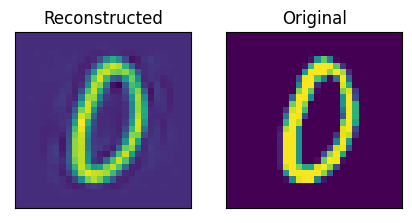

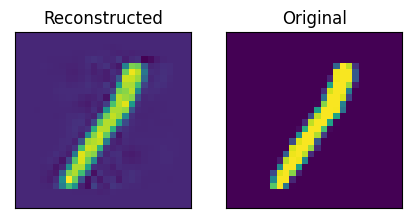

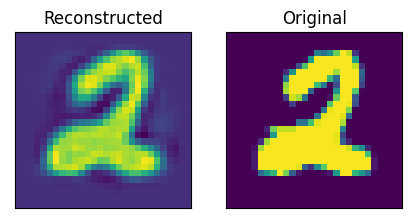

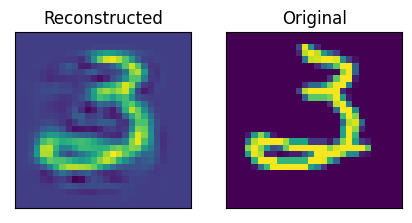

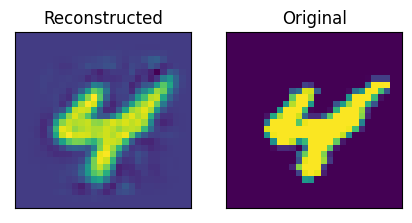

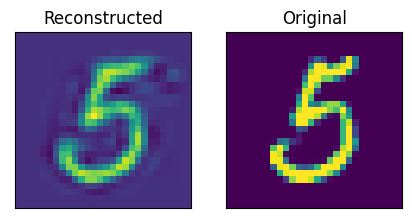

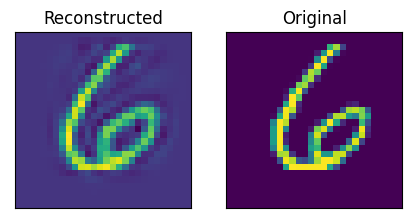

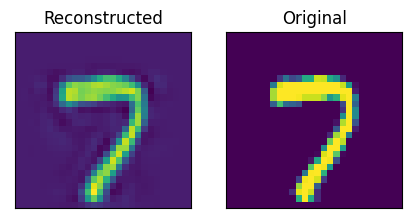

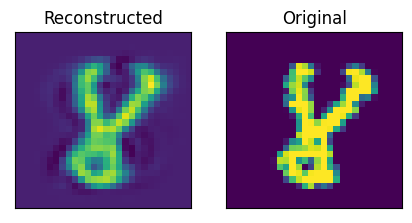

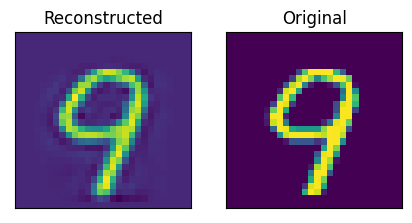

In [21]:
for i in range(10):
    plt.figure(figsize=(5, 2.5))
    eigenvalues, eigenvectors = eigs(covList[i],k=84)
    eigenvectors = np.real(eigenvectors)
    eigenvalues = np.real(eigenvalues)
    r = random.randint(0, len(separateData[i]))
    image = data_train[:, separateData[i][r]]
    closest = getClosest(eigenvectors, image - meanList[i])
    closest = closest + meanList[i]
    plt.subplot(1, 2, 1)
    plt.imshow(closest.reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.title("Reconstructed")
    plt.subplot(1, 2, 2)
    plt.imshow(image.reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.title("Original")

    plt.show()